In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [6]:
data=pd.read_csv('F:\\3.12. Example.csv')

In [7]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


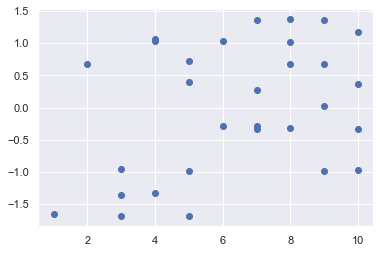

In [8]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.show()

In [9]:
kmeans=KMeans(2)
cluster=kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
a=kmeans.fit_predict(data)

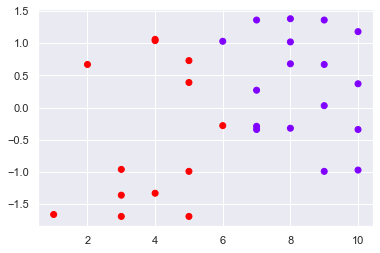

In [13]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c=a,cmap='rainbow')

# data is not scaled (standarized ) so it give more weightage to loyalty
so we have to satanderized the data

In [14]:
from sklearn import preprocessing

In [15]:
data_scaled=preprocessing.scale(data)

In [23]:
data_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [18]:
kmeans=KMeans(2)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
a=kmeans.fit_predict(data_scaled)
a

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0])

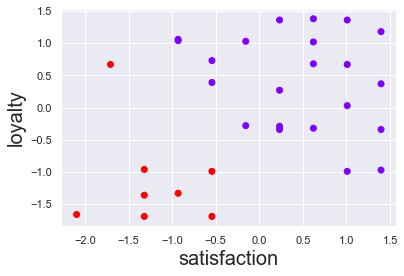

In [25]:
plt.scatter(data_scaled[:,0],data_scaled[:,1],c=a,cmap='rainbow')
plt.xlabel('satisfaction',fontsize=20)
plt.ylabel('loyalty',fontsize=20)
plt.show()

In [27]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

In [28]:
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.34807941029098,
 4.492446080195152,
 3.731185392455718]

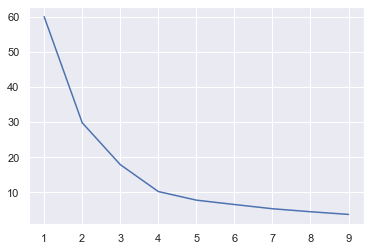

In [30]:
plt.plot(range(1,10),wcss)

# curve shows that appropriate no. of solution should be 4 or 5

In [36]:
kmeans=KMeans(5)
kmeans.fit(data_scaled)
cluster_new=data.copy()
cluster_new['predict']=kmeans.fit_predict(data_scaled)

In [37]:
cluster_new

,Satisfaction,Loyalty,predict
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,3
8,8,1.02,4
9,8,0.68,4


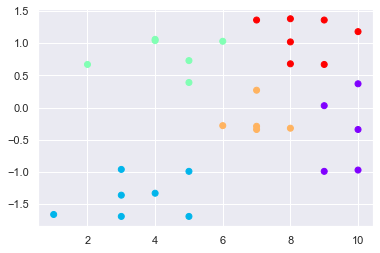

In [38]:
plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'],c=cluster_new['predict'],cmap='rainbow')

data orignol plotted but clustering on standerized data

In [39]:
kmeans.inertia_

7.792695153937187